# Analiza vzrokov prometnih nesreč v Sloveniji
S to analizo sva želela pokazati glavne razloge/faktorje za prometne nesreče v Sloveniji.

## Člana
* Nermin Mujagić
* Jaša Jovan

## Opis podatkov
Za projektno nalogo sva zbrala podatke na spletni strani podatki.gov.si, kjer sva vzela [podatke o prometnih nesrečah od leta 2009 pa do leta 2019](https://podatki.gov.si/dataset/mnzpprometne-nesrece-od-leta-2009-dalje). Datoteke so med seboj ločene po letih.

## Cilji
- starost udeleženca / vozniški staž
- delež alkohola v krvi
- vpliv dela prostih praznikov
- vpliv letnih casov
- starostne skupine

## Rezultati

# Imports

In [1]:
from csv import DictReader
import numpy as np
import chardet
import matplotlib
from scipy import stats
import collections
from datetime import datetime

import matplotlib.pyplot as plt

# Vnos podatkov

In [2]:
reader = DictReader(open('data/pn2019.csv','rt', encoding='Windows-1252'),delimiter=';')
podatki19 = np.array([[row['KlasifikacijaNesrece'], row['VrednostAlkotesta'], row['VozniskiStazVLetih'], row['UraPN'], row['DatumPN'], row['Spol'], row['Starost']] for row in reader])

reader = DictReader(open('data/pn2018.csv','rt', encoding='Windows-1252'),delimiter=';')
podatki18 = np.array([[row['KlasifikacijaNesrece'], row['VrednostAlkotesta'], row['VozniskiStazVLetih'], row['UraPN'], row['DatumPN'], row['Spol'], row['Starost']] for row in reader])

reader = DictReader(open('data/pn2017.csv','rt', encoding='Windows-1252'),delimiter=';')
podatki17 = np.array([[row['KlasifikacijaNesrece'], row['VrednostAlkotesta'], row['VozniskiStazVLetih'], row['UraPN'], row['DatumPN'], row['Spol'], row['Starost']] for row in reader])

reader = DictReader(open('data/pn2016.csv','rt', encoding='Windows-1252'),delimiter=';')
podatki16 = np.array([[row['KlasifikacijaNesrece'], row['VrednostAlkotesta'], row['VozniskiStazVLetih'], row['UraPN'], row['DatumPN'], row['Spol'], row['Starost']] for row in reader])

reader = DictReader(open('data/pn2015.csv','rt', encoding='Windows-1252'),delimiter=';')
podatki15 = np.array([[row['KlasifikacijaNesrece'], row['VrednostAlkotesta'], row['VozniskiStazVLetih'], row['UraPN'], row['DatumPN'], row['Spol'], row['Starost']] for row in reader])

reader = DictReader(open('data/pn2014.csv','rt', encoding='Windows-1252'),delimiter=';')
podatki14 = np.array([[row['KlasifikacijaNesrece'], row['VrednostAlkotesta'], row['VozniskiStazVLetih'], row['UraPN'], row['DatumPN'], row['Spol'], row['Starost']] for row in reader])

reader = DictReader(open('data/pn2013.csv','rt', encoding='Windows-1252'),delimiter=';')
podatki13 = np.array([[row['KlasifikacijaNesrece'], row['VrednostAlkotesta'], row['VozniskiStazVLetih'], row['UraPN'], row['DatumPN'], row['Spol'], row['Starost']] for row in reader])

reader = DictReader(open('data/pn2012.csv','rt', encoding='Windows-1252'),delimiter=';')
podatki12 = np.array([[row['KlasifikacijaNesrece'], row['VrednostAlkotesta'], row['VozniskiStazVLetih'], row['UraPN'], row['DatumPN'], row['Spol'], row['Starost']] for row in reader])

reader = DictReader(open('data/pn2011.csv','rt', encoding='Windows-1252'),delimiter=';')
podatki11 = np.array([[row['KlasifikacijaNesrece'], row['VrednostAlkotesta'], row['VozniskiStazVLetih'], row['UraPN'], row['DatumPN'], row['Spol'], row['Starost']] for row in reader])

reader = DictReader(open('data/pn2010.csv','rt', encoding='Windows-1252'),delimiter=';')
podatki10 = np.array([[row['KlasifikacijaNesrece'], row['VrednostAlkotesta'], row['VozniskiStazVLetih'], row['UraPN'], row['DatumPN'], row['Spol'], row['Starost']] for row in reader])

reader = DictReader(open('data/pn2009.csv','rt', encoding='Windows-1252'),delimiter=';')
podatki09 = np.array([[row['KlasifikacijaNesrece'], row['VrednostAlkotesta'], row['VozniskiStazVLetih'], row['UraPN'], row['DatumPN'], row['Spol'], row['Starost']] for row in reader])

In [3]:
# zdruzevanje vsega v en array
podatki = np.concatenate((podatki09, podatki10, podatki11, podatki12, 
                          podatki13, podatki14, podatki15, podatki16, 
                          podatki17, podatki18, podatki19))
podatki.shape[0]

397373

Kot vidimo imamo 397373 vseh ločenih primerov.

# Popravki, dodajanje

In [4]:
# popravljaje alkotest vrednosti
for i in range(len(podatki19)):
    podatki19[i][1] = float(podatki19[i][1].replace(',','.'))
    
# dobimo samo uro
ure = [[ura.split(".")[0]] for ura in podatki19[:, 3]]
podatki19 = np.append(podatki19, ure, axis=1)

# dodajanje datetimes
datetimes = []
for row in podatki19:
    ura, minute = row[3].split(".")
    dan, mesec, leto = row[4].split(".")
    
    datetimes.append([datetime(int(leto), int(mesec), int(dan), int(ura), int(minute))])
    
podatki19 = np.append(podatki19, datetimes, axis=1)
    

# dodajanje dnevov iz datuma
dnevi = [[datetime.strptime(d, "%d.%m.%Y").strftime('%A')] for d in podatki19[:, 4]]

podatki19 = np.append(podatki19, dnevi, axis=1)

# starostne skupine
# mladi -> 16-24
# odrasli -> 25-64
# starejsi -> 64<
star_skupine = []
for row in podatki19:
    starost = int(row[6])
    if starost >= 16 and starost <= 24:
        star_skupine.append(["1"])
    elif starost >= 25 and starost <= 64:
        star_skupine.append(["2"])
    elif starost >= 65:
        star_skupine.append(["3"])
    else:
        star_skupine.append(["-1"])
        
podatki19 = np.append(podatki19, star_skupine, axis=1)

# letni casi
letni_casi = []

for d in podatki19[:, 8]:
    t_leto = d.year
    if d >= datetime(t_leto, 3, 21) and d <= datetime(t_leto, 6, 21): # pomlad
        letni_casi.append(["1"])
        
    elif d > datetime(t_leto, 6, 21) and d <= datetime(t_leto, 9, 23): # poletje
        letni_casi.append(["2"])
    
    elif d > datetime(t_leto, 9, 23) and d <= datetime(t_leto, 12, 21): # jesen
        letni_casi.append(["3"])
    
    else: # zima
        letni_casi.append(["4"])

podatki19 = np.append(podatki19, letni_casi, axis=1)

In [5]:
# popravljaje alkotest vrednosti
for i in range(len(podatki)):
    podatki[i][1] = float(podatki[i][1].replace(',','.'))
    
# dobimo samo uro
ure = [[ura.split(".")[0]] for ura in podatki[:, 3]]
podatki = np.append(podatki, ure, axis=1)

# dodajanje datetimes
datetimes = []
for row in podatki:
    ura, minute = row[3].split(".")
    dan, mesec, leto = row[4].split(".")
    
    datetimes.append([datetime(int(leto), int(mesec), int(dan), int(ura), int(minute))])
    
podatki = np.append(podatki, datetimes, axis=1)
    

# dodajanje dnevov iz datuma
dnevi = [[datetime.strptime(d, "%d.%m.%Y").strftime('%A')] for d in podatki[:, 4]]

podatki = np.append(podatki, dnevi, axis=1)

# starostne skupine
# mladi -> 16-24
# odrasli -> 25-64
# starejsi -> 64<
star_skupine = []
for row in podatki:
    starost = int(row[6])
    if starost >= 16 and starost <= 24:
        star_skupine.append(["1"])
    elif starost >= 25 and starost <= 64:
        star_skupine.append(["2"])
    elif starost >= 65:
        star_skupine.append(["3"])
    else:
        star_skupine.append(["-1"])
        
podatki = np.append(podatki, star_skupine, axis=1)

# letni casi
letni_casi = []

for d in podatki[:, 8]:
    t_leto = d.year
    if d >= datetime(t_leto, 3, 21) and d <= datetime(t_leto, 6, 21): # pomlad
        letni_casi.append(["1"])
        
    elif d > datetime(t_leto, 6, 21) and d <= datetime(t_leto, 9, 23): # poletje
        letni_casi.append(["2"])
    
    elif d > datetime(t_leto, 9, 23) and d <= datetime(t_leto, 12, 21): # jesen
        letni_casi.append(["3"])
    
    else: # zima
        letni_casi.append(["4"])

podatki = np.append(podatki, letni_casi, axis=1)

# Porazdelitev klasifikacij nesreč

<BarContainer object of 4 artists>

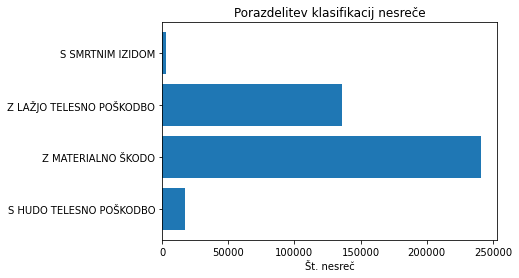

In [6]:
vrste = dict()
for poskodba in podatki[:, 0]:
    if(poskodba not in vrste):
        vrste[poskodba] = 1
    else:
        vrste[poskodba] += 1

x = list(vrste.values())
y = list(vrste.keys())

plt.title("Porazdelitev klasifikacij nesreče")
plt.xlabel("Št. nesreč")
plt.barh(y, x)

Največ izidov nesreč je le z materialno škodo, kar je tudi pričakovano, saj je manjša verjetnost poškodbe pri nesrečah, kot je le škoda na avtomobilu ali okolici. Najmanj je srmtnih izidov.

# Delež voznikov pod in nad dovoljeno mejo.

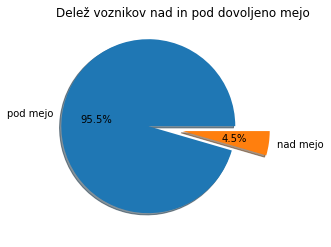

In [7]:
alkotest = np.array([float(value) for value in podatki[:,1]])
meja = 0.24

podMeja = alkotest[alkotest[:] < meja]
nadMeja = alkotest[alkotest[:] >= meja]

# Delež voznikov, ki so napihali nad dovoljeno mejo je le 4.4%
len(nadMeja) / len(alkotest)

labels = 'pod mejo', 'nad mejo'
sizes = [len(podMeja), len(nadMeja)]

plt.title("Delež voznikov nad in pod dovoljeno mejo")
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=(0.4,0))
plt.show()

Najbolj zanimiv podatek za naju je bil, da je le 4.5% voznikov imelo prekomerno vsebino alkohola pri alkotestu (vpihu). Pričakovala sva, da bo to večji delež. Verjetno se bo izkazalo, da bo korelacija precej močna.

# Nesreče vozniški staž

DescribeResult(nobs=397373, minmax=(0, 99), mean=13.630108235838872, variance=201.4330764599538, skewness=0.9073845711636381, kurtosis=-0.09489286626119453)


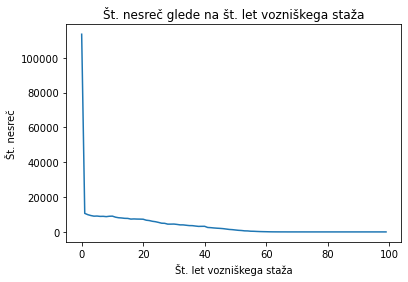

In [8]:
vozniskiStaz = np.array([int(value) for value in podatki[:,2]])
stazNesrece = collections.Counter(vozniskiStaz)

print(stats.describe(vozniskiStaz))

stazNesrece = collections.OrderedDict(sorted(stazNesrece.items()))

keys = list(stazNesrece.keys())
values = list(stazNesrece.values())

plt.title('Št. nesreč glede na št. let vozniškega staža')
plt.ylabel('Št. nesreč')
plt.xlabel('Št. let vozniškega staža')
plt.plot(keys,values)

Zelo očitno da je največ nesreč pri vozniškemu stažu do 1 leta. Trend je takšen, da z več leti staža, manjša se št. nesreč. Vredno je tudi omeniti, da seveda ker so podatki od 2009 - 2019, je seveda največ zabeleženo o tistih, ki imajo 10 let staž ali manj. Povprecno stevilo vozniškega staza je 15.7 let.

# Nesreče ponoči
### Nesreče ponoči

In [9]:
# Nesreče ponoči 23h -> 4h
nesrece_ponoci = podatki[(podatki[:, 7].astype(int) < 5) | (podatki[:, 7].astype(int) > 22)]

len(nesrece_ponoci) / len(podatki)

0.05986566777309983

Približno 6% nesreč se zgodi ponoči.

### Delež prekomerno vinjenih ponoči

In [10]:
alkotestPonoci = np.array([float(value) for value in podatki[:, 1]])
nadMejaPonoci = alkotestPonoci[alkotestPonoci[:] >= meja]

len(nadMejaPonoci) / len(nesrece_ponoci)

0.7528269368195385

Kar 75% voznikov je prekomerno vinjenih ponoči.

# Tedenska statistika

Ponedeljek 0.02241165241928783 60245
Torek 0.024300475413574593 57003
Sreda 0.024619905757570545 59209
Cetrtek 0.0273486606550854 60328
Petek 0.03268573630796888 70059
Sobota 0.055343536432765364 51945
Nedelja 0.05845039394567683 38584


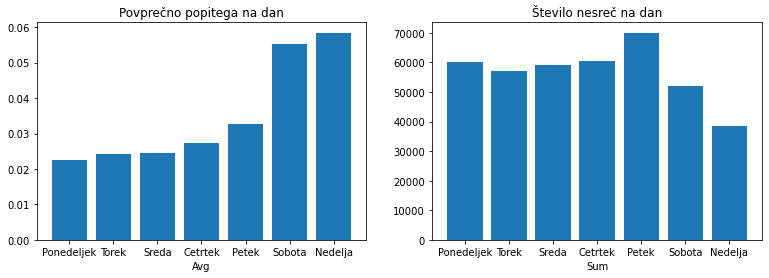

In [11]:
labels = ["Ponedeljek", "Torek", "Sreda", "Cetrtek", "Petek", "Sobota", "Nedelja"]

ponedeljek = podatki[podatki[:, 9] == "Monday", 1]
torek = podatki[podatki[:, 9] == "Tuesday", 1]
sreda = podatki[podatki[:, 9] == "Wednesday", 1]
cetrtek = podatki[podatki[:, 9] == "Thursday", 1]
petek = podatki[podatki[:, 9] == "Friday", 1]
sobota = podatki[podatki[:, 9] == "Saturday", 1]
nedelja = podatki[podatki[:, 9] == "Sunday", 1]

avg_ponedeljek = sum(ponedeljek.astype(float)) / len(ponedeljek)
avg_torek = sum(torek.astype(float)) / len(torek)
avg_sreda = sum(sreda.astype(float)) / len(sreda)
avg_cetrtek = sum(cetrtek.astype(float)) / len(cetrtek)
avg_petek = sum(petek.astype(float)) / len(petek)
avg_sobota = sum(sobota.astype(float)) / len(sobota)
avg_nedelja = sum(nedelja.astype(float)) / len(nedelja)

x_povp = [avg_ponedeljek, avg_torek, avg_sreda, avg_cetrtek, avg_petek, avg_sobota, avg_nedelja]
x_sum = [len(ponedeljek), len(torek), len(sreda), len(cetrtek), len(petek), len(sobota), len(nedelja)]

print("Ponedeljek", avg_ponedeljek, len(ponedeljek))
print("Torek", avg_torek, len(torek))
print("Sreda", avg_sreda, len(sreda))
print("Cetrtek", avg_cetrtek, len(cetrtek))
print("Petek", avg_petek, len(petek))
print("Sobota", avg_sobota, len(sobota))
print("Nedelja", avg_nedelja, len(nedelja))


figure, axis = plt.subplots(1, 2, figsize=(13, 4))
  
axis[0].bar(labels, x_povp)
axis[0].set_title("Povprečno popitega na dan")
axis[0].set_xlabel("Avg")
  
axis[1].bar(labels, x_sum)
axis[1].set_title("Število nesreč na dan")
axis[1].set_xlabel("Sum")

plt.show()

Vidi se da skozi teden ljude manj pijejo, v petek je manjši skok(ljudem se verjetno mudi domov) in potem še večji za čez vikend. Čez vikend se vidi upad količine nesreč, verjetno, ker so ljudje bolj doma, skozi teden se pa vozijo v in iz službe.

# Količina popitega po dela prostih praznikih

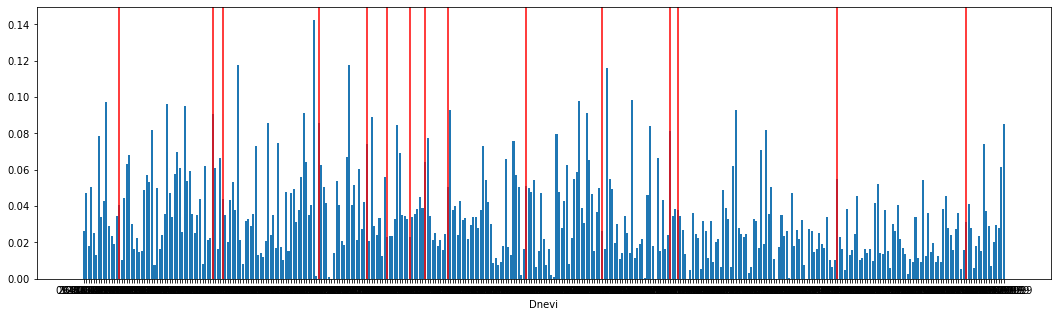

In [12]:
sorted_podatki19 = podatki19[np.argsort(podatki19[:, 7])]

sorted_podatki19_dict = dict()
for row in sorted_podatki19:
    datum = row[4]
    
    if datum not in sorted_podatki19_dict:
        rez = sorted_podatki19[sorted_podatki19[:, 4] == datum, 1]
        sorted_podatki19_dict[datum] = sum(rez.astype(float)) / len(rez)
        
labels = list(sorted_podatki19_dict.keys())
x = list(sorted_podatki19_dict.values())

dela_prosti_dnevi2019 = ["01.01.2019", "02.01.2019", "08.02.2019", "21.04.2019", "22.04.2019", "27.04.2019", 
                     "01.05.2019", "02.05.2019", "09.06.2019", "25.06.2019", "15.08.2019", "31.10.2019",
                    "01.11.2019", "25.12.2019", "26.12.2019"]

plt.figure(figsize=(40, 5))
plt.subplot(1, 2, 1)
plt.bar(labels, x)
plt.xlabel("Dnevi")

for d in dela_prosti_dnevi2019:
    plt.axvline(x=d, color='r', label=d)

In [13]:
print("02.01.2019", sorted_podatki19_dict["02.01.2019"])
print("03.01.2019", sorted_podatki19_dict["03.01.2019"])
print("Razlika:", sorted_podatki19_dict["03.01.2019"] - sorted_podatki19_dict["02.01.2019"])
print("----------------")

print("08.02.2019", sorted_podatki19_dict["08.02.2019"])
print("09.02.2019", sorted_podatki19_dict["09.02.2019"])
print("Razlika:", sorted_podatki19_dict["09.02.2019"] - sorted_podatki19_dict["08.02.2019"])
print("----------------")

print("21.04.2019", sorted_podatki19_dict["21.04.2019"])
print("22.04.2019", sorted_podatki19_dict["22.04.2019"])
print("Razlika:", sorted_podatki19_dict["22.04.2019"] - sorted_podatki19_dict["21.04.2019"])
print("----------------")

print("27.04.2019", sorted_podatki19_dict["27.04.2019"])
print("28.04.2019", sorted_podatki19_dict["28.04.2019"])
print("Razlika:", sorted_podatki19_dict["28.04.2019"] - sorted_podatki19_dict["27.04.2019"])
print("----------------")

print("02.05.2019", sorted_podatki19_dict["02.05.2019"])
print("03.05.2019", sorted_podatki19_dict["03.05.2019"])
print("Razlika:", sorted_podatki19_dict["03.05.2019"] - sorted_podatki19_dict["02.05.2019"])
print("----------------")

02.01.2019 0.03125
03.01.2019 0.00676923076923077
Razlika: -0.02448076923076923
----------------
08.02.2019 0.06426229508196721
09.02.2019 0.026515151515151516
Razlika: -0.03774714356681569
----------------
21.04.2019 0.09046153846153845
22.04.2019 0.026385542168674697
Razlika: -0.06407599629286376
----------------
27.04.2019 0.022794117647058826
28.04.2019 0.061290322580645165
Razlika: 0.03849620493358634
----------------
02.05.2019 0.07400000000000001
03.05.2019 0.01574074074074074
Razlika: -0.058259259259259275
----------------


Iz zgornjih rezulatov kaze, da dela prosti prazniki ne vplivajo na vinjenost voznikov. Tezko je reci ali zato, ker
praznike prezivijo doma in se ne vozijo ali pa ker ne popijejo vec kot ob drugih dnevih.

# Nesreče po urah

In [14]:
ura_avg_dict = dict()
ura_sum_dict = dict()

for ura in range(0, 24):
    rez = podatki[podatki[:, 7].astype(int) == ura, 1].astype(float)
    ura_avg_dict[ura] = sum(rez) / len(rez)
    ura_sum_dict[ura] = len(rez)

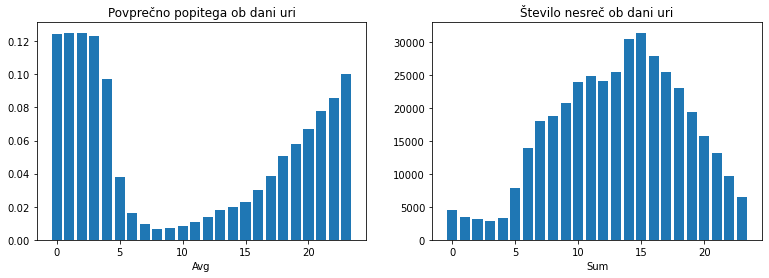

In [15]:
ura_avg_dict = dict(sorted(ura_avg_dict.items()))

ura_sum_dict = dict(sorted(ura_sum_dict.items()))

labelsAvg = list(ura_avg_dict.keys())
xAvg = list(ura_avg_dict.values())

labelsSum = list(ura_sum_dict.keys())
xSum = list(ura_sum_dict.values())

figure, axis = plt.subplots(1, 2, figsize=(13, 4))
  
axis[0].bar(labelsAvg, xAvg)
axis[0].set_title("Povprečno popitega ob dani uri")
axis[0].set_xlabel("Avg")
  
axis[1].bar(labelsSum, xSum)
axis[1].set_title("Število nesreč ob dani uri")
axis[1].set_xlabel("Sum")

plt.show()

Kot se vidi iz spodnjih grafov se kolicinsko zgodi vec nesrec podnevi, vendar ponoci so vozniki bolj vinjeni. Grafa sta si skoraj inverzna.

# Moški vs ženske

In [16]:
nesrece_moski = podatki[podatki[:, 5] == "MOŠKI"]
len(nesrece_moski) / len(podatki)

0.6853913074114245

Moški so odgovorni za približno 68% nesreč. To se bo tudi videlo v spodnjem razdelku.

# Skupna povprečna vinjenost

In [17]:
sum(podatki[:, 1].astype(float)) / len(podatki)

0.03337670148701701

# Nesreče glede na starostne skupine

In [18]:
mladi = podatki[podatki[:, 10] == "1"]
odrasli = podatki[podatki[:, 10] == "2"]
starejsi = podatki[podatki[:, 10] == "3"]
drugo = podatki[podatki[:, 10] == "-1"]

mladi_avg_vinj = sum(mladi[:, 1].astype(float)) / len(mladi)
odrasli_avg_vinj = sum(odrasli[:, 1].astype(float)) / len(odrasli)
starejsi_avg_vinj = sum(starejsi[:, 1].astype(float)) / len(starejsi)
drugo_avg_vinj = sum(drugo[:, 1].astype(float)) / len(drugo)

mladi_moski = len(mladi[mladi[:, 5] == "MOŠKI"])
odrasli_moski = len(odrasli[odrasli[:, 5] == "MOŠKI"])
starejsi_moski = len(starejsi[starejsi[:, 5] == "MOŠKI"])
drugo_moski = len(drugo[drugo[:, 5] == "MOŠKI"])

print("Mladi")
print("Število nesreč:", len(mladi))
print("Povprečna vinjenost:", mladi_avg_vinj)
print("Delež moških:", mladi_moski / len(mladi))
print("Delež nesreč:", len(mladi) / len(podatki))
print("--------------------")

print("Srednji")
print("Število nesreč:", len(odrasli))
print("Povprečna vinjenost:", odrasli_avg_vinj)
print("Delež moških:", odrasli_moski / len(odrasli))
print("Delež nesreč:", len(odrasli) / len(podatki))
print("--------------------")

print("Stari")
print("Število nesreč:", len(starejsi))
print("Povprecna vinjenost:", starejsi_avg_vinj)
print("Delež moških:", starejsi_moski / len(starejsi))
print("Delež nesreč:", len(starejsi) / len(podatki))
print("--------------------")

print("Drugo")
print("Število nesreč:", len(drugo))
print("Povprečna vinjenost:", drugo_avg_vinj)
print("Delež moških:", drugo_moski / len(drugo))
print("Delež nesreč:", len(drugo) / len(podatki))
print("--------------------")

Mladi
Število nesreč: 63600
Povprečna vinjenost: 0.029783647798742083
Delež moških: 0.6761320754716981
Delež nesreč: 0.16005113583459368
--------------------
Srednji
Število nesreč: 286478
Povprečna vinjenost: 0.03662801332039529
Delež moških: 0.6864959962021516
Delež nesreč: 0.7209297058431248
--------------------
Stari
Število nesreč: 39377
Povprecna vinjenost: 0.022012088274881218
Delež moških: 0.7120908144348224
Delež nesreč: 0.09909329521633327
--------------------
Drugo
Število nesreč: 7918
Povprečna vinjenost: 0.0011202323819146248
Delež moških: 0.5870169234655216
Delež nesreč: 0.019925863105948315
--------------------


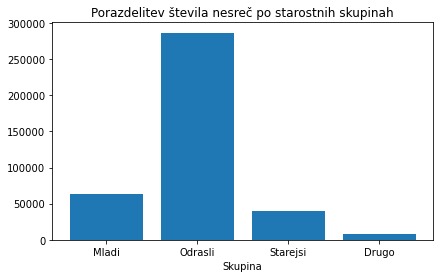

In [19]:
labels = ["Mladi", "Odrasli", "Starejsi", "Drugo"]
x = [len(mladi), len(odrasli), len(starejsi), len(drugo)]

plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
plt.bar(labels, x)
plt.title("Porazdelitev števila nesreč po starostnih skupinah")
plt.xlabel("Skupina")
plt.show()

Vidi se, da odrasli zagrešijo največ nesreč in so tudi v povprečju najbolj vinjeni. To je verjetno, ker jih ima večina službo in se iz nje vračajo ob časih, kjer so nesreče najbolj pogoste. Za največjo vinjenost pa poskrbijo, ko gredo po službi se kaj popiti in potem šele domov.
Pri vseh starostnih skupinah se pa vidi, da moški konstantno napravijo okoli 68% nesreč.

# Letni časi

In [20]:
pomlad = podatki[podatki[:, 11] == "1"]
poletje = podatki[podatki[:, 11] == "2"]
jesen = podatki[podatki[:, 11] == "3"]
zima = podatki[podatki[:, 11] == "4"]

print("Pomlad")
print("Število nesreč:", len(pomlad))
print("Povprečna vinjenost:", sum(pomlad[:, 1].astype(float)) / len(pomlad))
print("----------------")

print("Poletje")
print("Število nesreč:", len(poletje))
print("Povprečna vinjenost:", sum(poletje[:, 1].astype(float)) / len(poletje))
print("----------------")

print("Jesen")
print("Število nesreč:", len(jesen))
print("Povprečna vinjenost:", sum(jesen[:, 1].astype(float)) / len(jesen))
print("----------------")

print("Zima")
print("Število nesreč:", len(zima))
print("Povprečna vinjenost:", sum(zima[:, 1].astype(float)) / len(zima))

Pomlad
Število nesreč: 101628
Povprečna vinjenost: 0.03305712992482393
----------------
Poletje
Število nesreč: 107014
Povprečna vinjenost: 0.03330853906965452
----------------
Jesen
Število nesreč: 100556
Povprečna vinjenost: 0.032961931659970585
----------------
Zima
Število nesreč: 88175
Povprečna vinjenost: 0.03430076552310759


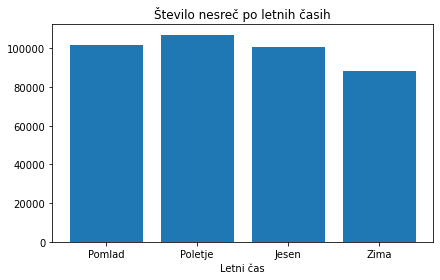

In [21]:
labels = ["Pomlad", "Poletje", "Jesen", "Zima"]
x = [len(pomlad), len(poletje), len(jesen), len(zima)]

plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
plt.bar(labels, x)
plt.title("Število nesreč po letnih časih")
plt.xlabel("Letni čas")
plt.show()

Pomladi, poleti in jeseni si je število nesreč podobno, pozimi se vidi upadec števila nesreč. Povprečna vinjenost je v vseh letnih časih približno ista, kar kaže, da letni časi ne vplivajo toliko na količino popitega.

# Zaključek
Po najinem mnenju je težko sklepati o alkoholiziranosti splošne populacije saj ne vemo koliko ljudi pije doma ali pa se v enem avtu vozi več vinjenih oseb. Zna biti pa dober indikator za navade splošne populacije, v smislu ob katerih časih največ pijejo. Pri preverjanju dela prostih praznikov nisva našla nekega prirastka vinjenosti ali števila nesreč. Pri preverjanju letnih časov se vinjenost nič ne dvigne in število nesreč je za pomlad, poletje, jesen približno isto, vendar se vidi upad v zimskem času, verjetno, ker se ljudje zadrzavajo bolj doma na toplem kot da bi šli ven na pijačo ob neugodnih vremenskih razmerah.